# Lab 6.04 - Regression analysis

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 4
The file production.csv contains the production cost per unit produced. That is, producing the 100th unit costs 82 EUR and producing the 600th unit costs 34 EUR.  

1. Make the following plot  

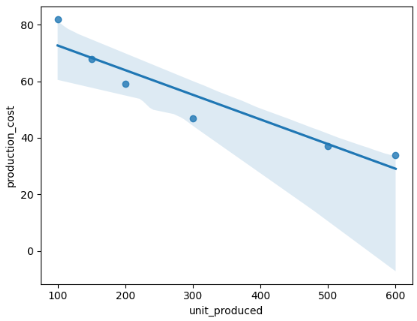

2. Based on this plot  
    1. Can you decide whether the relationship between the number of units produced and the production cost is positive / negative.   
    2. Can you decide whether the relationship between number of units produced and production costis weak / strong.  
    3. Can you decide whether $R$ will be between [-1,-0.5] / [-0.5, 0] / [0, 0.5] / [0.5,1].  
3. What is the production cost for the 400th unit?  
4. How much loss will the company incur if not a single unit is produced?  
5. How much does it cost in total to produce 1000 units  


Some answers:

- 3. the 400th unit costs 46.5051  
- 4. loss when no unit produced 81.392  
- 5. total cost for 1000 units 37739.8969

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/production.csv', delimiter=";")
df.head(20)

,unit_produced,production_cost
0,100,82
1,150,68
2,200,59
3,300,47
4,500,37
5,600,34


<Axes: xlabel='unit_produced', ylabel='production_cost'>

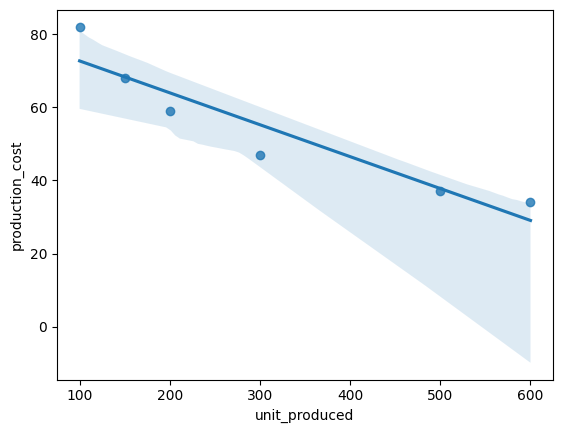

In [7]:
sns.regplot(data=df, x='unit_produced', y='production_cost')

een negatief verband: Hoe meer eenheden geproduceerd, hoe lager de kost. 
Negatief : Rechte is dalend
Sterk verband : Punten sluiten mooi aan bij de rechte
sterk dalend verband dus R zal wellicht liggen tussen -1 & -0.5 => interval is [-1,-0.5]

In [8]:
cor = np.corrcoef(df.unit_produced,df.production_cost)[0][1]
print(f"R ={cor:.4f} ")

R =-0.9395 


In [9]:
# Productiekost 400e eenheid, obv grafiek ongeveer 45. Maar we berkenen het

x = df.unit_produced
y = df.production_cost
a, b = np.polyfit(x, y, 1)
print(f'y = {a} * x + {b}')
# Berekenen voor 400
print(f'gemiddelde kost in 400 = {a * 400 + b}')

y = -0.08721649484536084 * x + 81.3917525773196
gemiddelde oppervlakte in 400 = 46.50515463917526


In [10]:
# vraag 4
print (f"Regression line:  ŷ = {a * 0 +b} ")

Regression line:  ŷ = 81.3917525773196 


In [12]:
# vraag 5
print (f"Regression line:  ŷ = {a * 1000 +b} ")
# dit is negatief dit kan uiteraard niet.

# nieuwe vraag: kost voor 1000 eenheden te produceren

totaal = 0
for i in range(1,1001):
    totaal += a * i + b
print(totaal)

Regression line:  ŷ = -5.824742268041248 
37739.89690721649


In [13]:
np.sum(a*i+b for i in range(1,1001))

/tmp/ipykernel_91131/832889605.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(a*i+b for i in range(1,1001))


37739.89690721649